In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Housing.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished


In [9]:
df = pd.get_dummies(df, columns=['furnishingstatus'], prefix='furnish', drop_first=True)

In [10]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnish_semi-furnished,furnish_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False


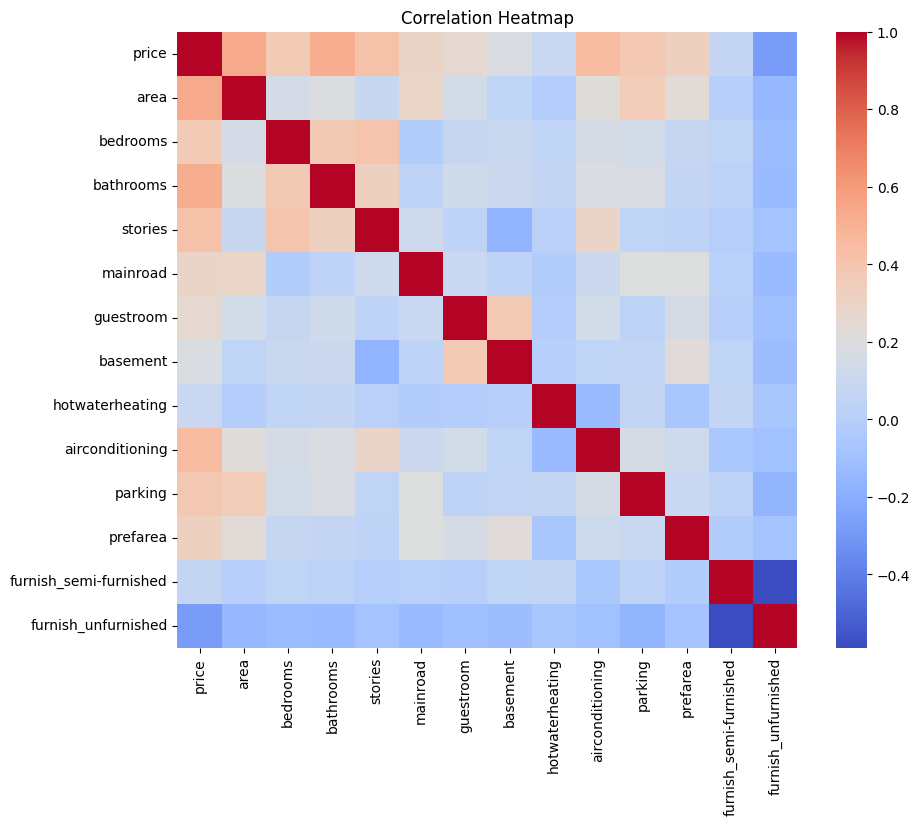

In [11]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   price                   545 non-null    int64
 1   area                    545 non-null    int64
 2   bedrooms                545 non-null    int64
 3   bathrooms               545 non-null    int64
 4   stories                 545 non-null    int64
 5   mainroad                545 non-null    int64
 6   guestroom               545 non-null    int64
 7   basement                545 non-null    int64
 8   hotwaterheating         545 non-null    int64
 9   airconditioning         545 non-null    int64
 10  parking                 545 non-null    int64
 11  prefarea                545 non-null    int64
 12  furnish_semi-furnished  545 non-null    bool 
 13  furnish_unfurnished     545 non-null    bool 
dtypes: bool(2), int64(12)
memory usage: 52.3 KB


In [22]:
from sklearn.preprocessing import StandardScaler

X = df.drop('price',axis=1)
Y = df['price']

scaler = StandardScaler()
numeric_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

X[numeric_cols]=scaler.fit_transform(X[numeric_cols])

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.38, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression

# Initialize and train
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict
Y_pred = lr_model.predict(X_test)

# Metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


MAE: 891306.94
MSE: 1493903475847.07
RMSE: 1222253.44
R² Score: 0.6710


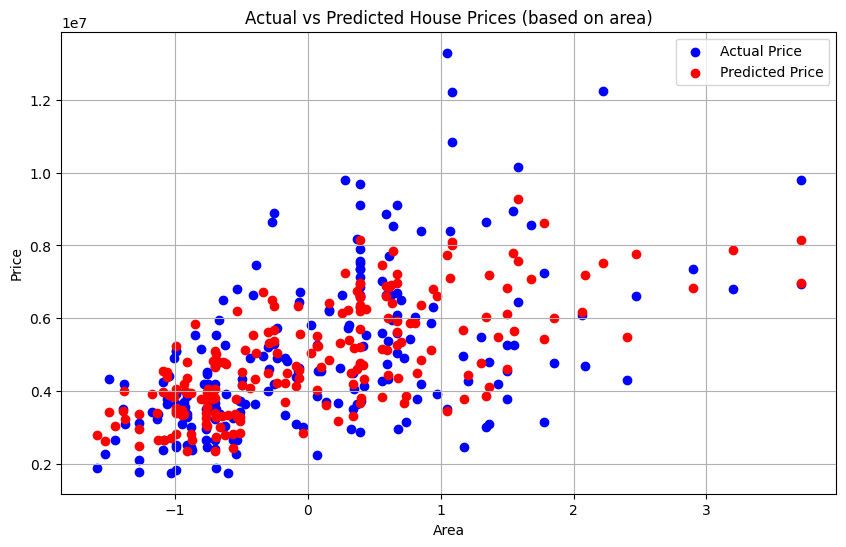

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test['area'], Y_test, color='blue', label='Actual Price')
plt.scatter(X_test['area'], Y_pred, color='red', label='Predicted Price')
plt.title("Actual vs Predicted House Prices (based on area)")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


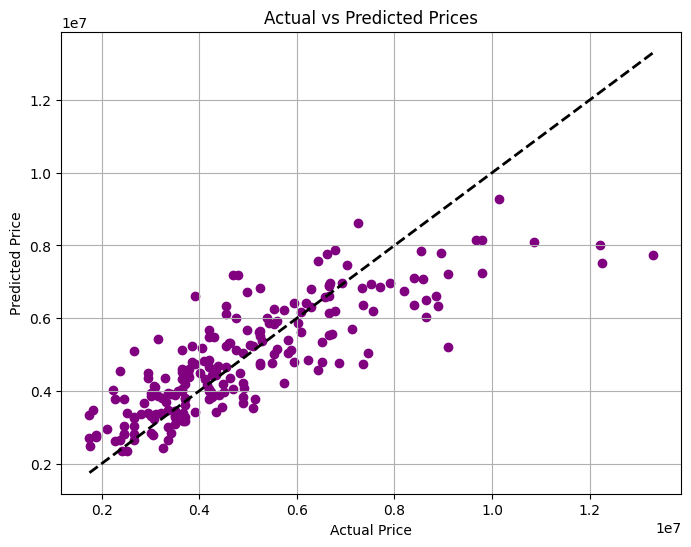

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='purple')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()


In [30]:
df.head(1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnish_semi-furnished,furnish_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False


In [31]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})

print(coefficients.sort_values(by='Coefficient', ascending=False))


                   Feature    Coefficient
7          hotwaterheating  716268.536400
8          airconditioning  647055.136850
0                     area  551430.222540
10                prefarea  483387.152859
2                bathrooms  479498.940502
6                 basement  418891.238529
4                 mainroad  395325.426562
3                  stories  347610.392045
5                guestroom  323340.786025
9                  parking  200724.621074
1                 bedrooms   93789.184226
11  furnish_semi-furnished -102926.515086
12     furnish_unfurnished -421265.831154
